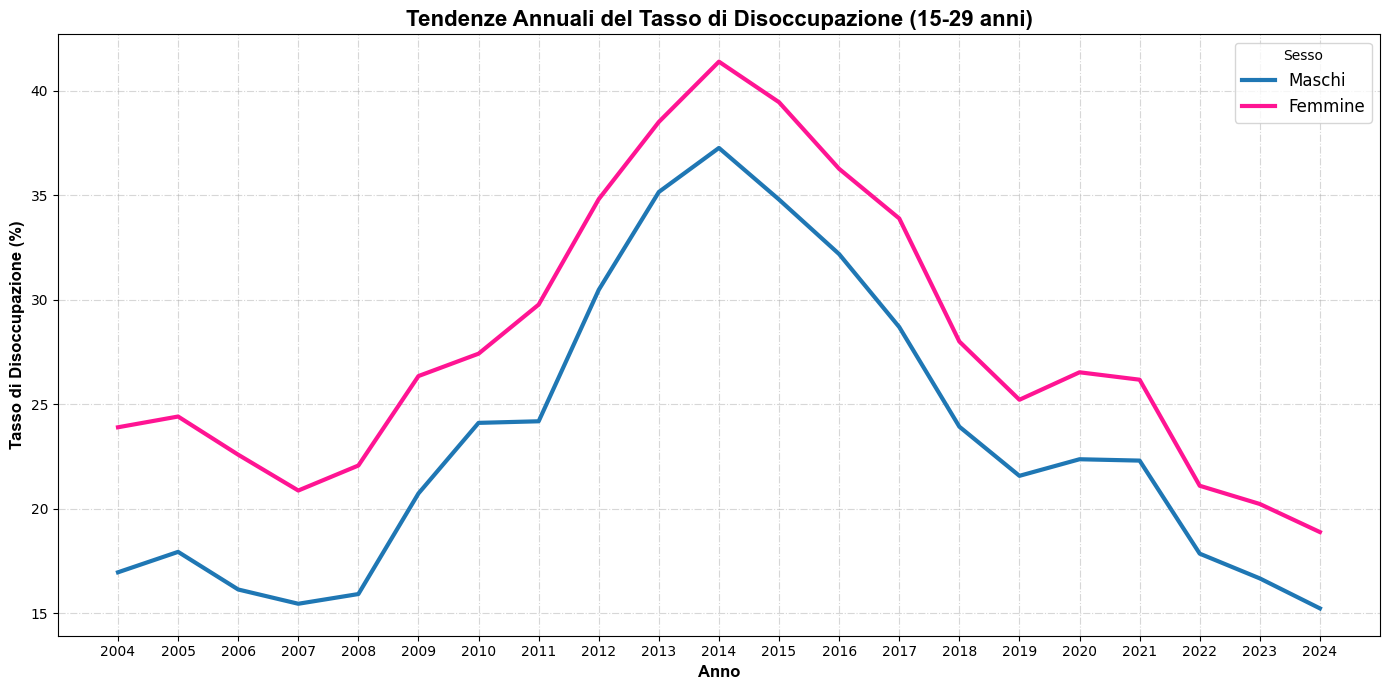

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricare i due dataset (uno per 15-24 anni e l'altro per 18-29 anni)
# baseD = 'C:/Users/bregu/Desktop/UNIMI/VISUALIZZAZIONE SCIENTIFICA/progetto/'
file_path_15_24 = './disoccupazione giovanile 15-24.csv' # Sostituisci con il percorso del primo file
file_path_18_29 = './disoccupazione giovanile 18-29.csv'  # Sostituisci con il percorso del secondo file


# Caricare i dati
data_15_24 = pd.read_csv(file_path_15_24)
data_18_29 = pd.read_csv(file_path_18_29)

# Filtrare le colonne rilevanti
data_15_24_filtered = data_15_24[['TIME', 'Sesso', 'Value']].dropna()
data_18_29_filtered = data_18_29[['TIME', 'Sesso', 'Value']].dropna()

# Estrarre l'anno da TIME
data_15_24_filtered['Anno'] = data_15_24_filtered['TIME'].str[:4]
data_18_29_filtered['Anno'] = data_18_29_filtered['TIME'].str[:4]

# Calcolare la media per il gruppo di età 18-24 e per il gruppo 15-29 separatamente
# Per il dataset 15-24 anni, possiamo usare i dati così come sono
# Per il dataset 18-29 anni, calcoliamo la media tra i 18-24 anni (inclusi)

# Gruppo 18-24 anni per dataset 18-29 (media dei dati)
data_18_29_filtered_18_24 = data_18_29_filtered[data_18_29_filtered['Anno'].between('2018', '2024')]

# Unire i dati dei gruppi 15-24 e 18-29
combined_data = pd.concat([data_15_24_filtered, data_18_29_filtered_18_24])

# Calcolare la media per ogni anno, sesso
aggregated_combined_data = combined_data.groupby(['Anno', 'Sesso'], as_index=False)['Value'].mean()

# Pivot per organizzare i dati
pivot_combined_data = aggregated_combined_data.pivot(index='Anno', columns='Sesso', values='Value')

# Creare il grafico con miglioramenti estetici
plt.figure(figsize=(14, 7))

# Linee personalizzate per maschi e femmine (15-29 anni)
sns.lineplot(data=pivot_combined_data['maschi'], label='Maschi', color='#1f77b4', linewidth=3)
sns.lineplot(data=pivot_combined_data['femmine'], label='Femmine', color='#ff1493', linewidth=3)

# Aggiungi titolo e etichette
plt.title('Tendenze Annuali del Tasso di Disoccupazione (15-29 anni)', fontsize=16, fontweight='bold', family='Arial')
plt.xlabel('Anno', fontsize=12, fontweight='bold', family='Arial')
plt.ylabel('Tasso di Disoccupazione (%)', fontsize=12, fontweight='bold', family='Arial')

# Miglioramento della leggibilità con griglie
plt.grid(True, linestyle='dashdot', alpha=0.5)

# Legenda
plt.legend(title='Sesso', loc='upper right', fontsize=12)

# Aggiustamenti per una visualizzazione migliore
plt.tight_layout()

# Mostrare il grafico
plt.show()

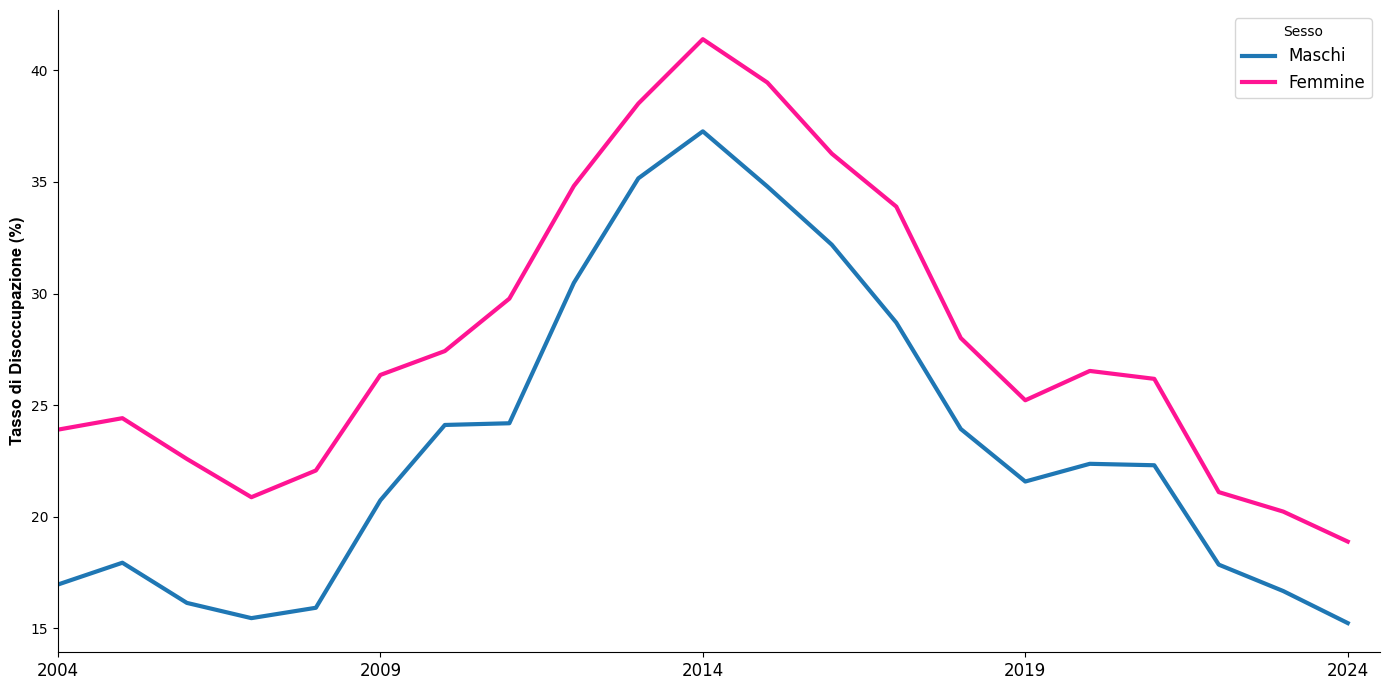

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricare i due dataset (uno per 15-24 anni e l'altro per 18-29 anni)

file_path_15_24 = './disoccupazione giovanile 15-24.csv' # Sostituisci con il percorso del primo file
file_path_18_29 = './disoccupazione giovanile 18-29.csv'  # Sostituisci con il percorso del secondo file

# Caricare i dati
data_15_24 = pd.read_csv(file_path_15_24)
data_18_29 = pd.read_csv(file_path_18_29)

# Filtrare le colonne rilevanti
data_15_24_filtered = data_15_24[['TIME', 'Sesso', 'Value']].dropna()
data_18_29_filtered = data_18_29[['TIME', 'Sesso', 'Value']].dropna()

# Estrarre l'anno da TIME e convertirlo in formato numerico
data_15_24_filtered['Anno'] = data_15_24_filtered['TIME'].str[:4].astype(int)
data_18_29_filtered['Anno'] = data_18_29_filtered['TIME'].str[:4].astype(int)

# Calcolare la media per il gruppo di età 18-24 e per il gruppo 15-29 separatamente
data_18_29_filtered_18_24 = data_18_29_filtered[data_18_29_filtered['Anno'].between(2018, 2024)]

# Unire i dati dei gruppi 15-24 e 18-29
combined_data = pd.concat([data_15_24_filtered, data_18_29_filtered_18_24])

# Calcolare la media per ogni anno, sesso
aggregated_combined_data = combined_data.groupby(['Anno', 'Sesso'], as_index=False)['Value'].mean()

# Pivot per organizzare i dati
pivot_combined_data = aggregated_combined_data.pivot(index='Anno', columns='Sesso', values='Value')

# Creare il grafico con miglioramenti estetici
plt.figure(figsize=(14, 7))

# Linee personalizzate per maschi e femmine (15-29 anni)
sns.lineplot(data=pivot_combined_data['maschi'], label='Maschi', color='#1f77b4', linewidth=3)
sns.lineplot(data=pivot_combined_data['femmine'], label='Femmine', color='#ff1493', linewidth=3)

# Aggiungi titolo e etichette
plt.ylabel('Tasso di Disoccupazione (%)', fontsize=12, fontweight='bold', family='Arial')
plt.xlabel("") # Rimuovere l'etichetta dell'asse x

# Impostare le etichette dell'asse x ogni 5 anni, dal 2004 al 2024
xticks = [year for year in range(2004, 2025, 5)]
plt.xticks(ticks=xticks, labels=xticks, fontsize=12)

# Legenda
plt.legend(title='Sesso', loc='upper right', fontsize=12)

# Aggiustamenti per una visualizzazione migliore
plt.tight_layout()

# Impostare i limiti dell'asse X in modo che non ci sia spazio vuoto
# plt.xlim([2004, None]) 
plt.xlim([2004, combined_data['Anno'].max() + 0.5])  # Aggiunge un anno come margine


# Rimuovere gli assi superiore e destro
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Mostrare il grafico
plt.show()

andamento del tasso di disoccupazione maschi e femmine (tra 15 e 29 anni in italia) dal 2004 al 2024

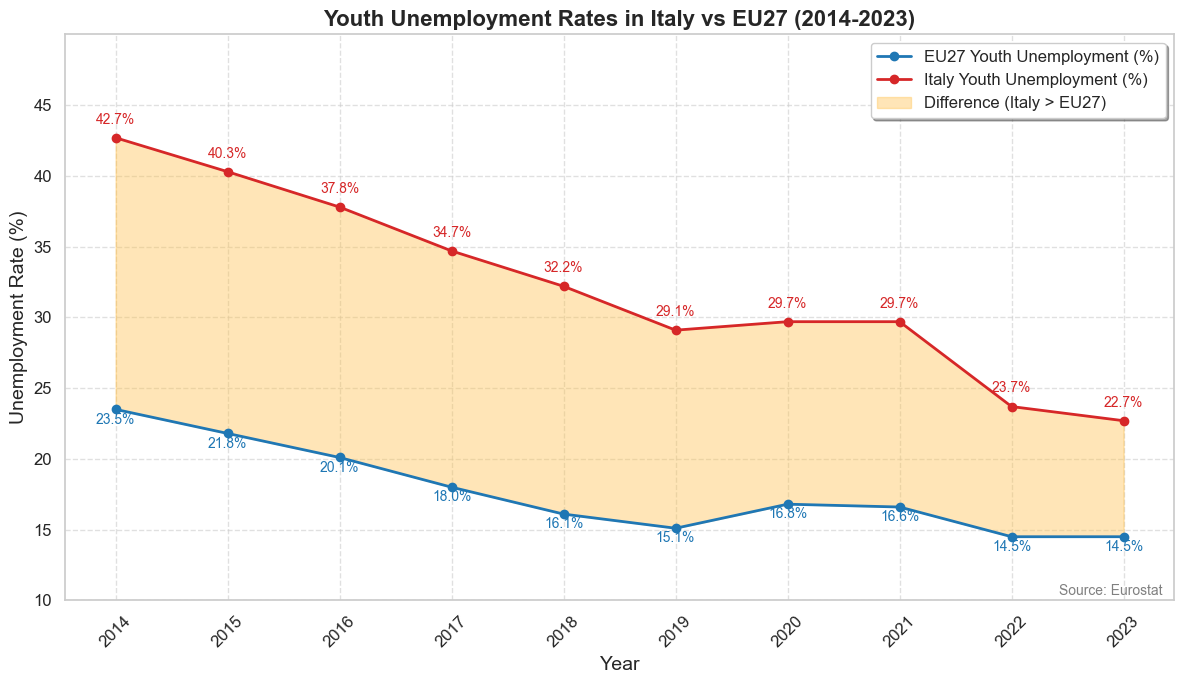

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Dati
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
eu27 = [23.5, 21.8, 20.1, 18.0, 16.1, 15.1, 16.8, 16.6, 14.5, 14.5]
italy = [42.7, 40.3, 37.8, 34.7, 32.2, 29.1, 29.7, 29.7, 23.7, 22.7]

# Crea il grafico
plt.figure(figsize=(12, 7))

# Applica uno stile Seaborn (opzionale)
sns.set_theme(style="whitegrid") 

# Linee dei dati
plt.plot(years, eu27, marker='o', label='EU27 Youth Unemployment (%)', color='#1f77b4', linewidth=2)
plt.plot(years, italy, marker='o', label='Italy Youth Unemployment (%)', color='#d62728', linewidth=2)

# Evidenziazione delle differenze
plt.fill_between(years, eu27, italy, where=(np.array(italy) > np.array(eu27)), 
                 color='#FFC04C', alpha=0.4, label='Difference (Italy > EU27)')

# Etichette personalizzate
for i, (y_eu, y_it) in enumerate(zip(eu27, italy)):
    if not np.isnan(y_it) and not np.isnan(y_eu):
        plt.text(years[i], y_it + 1, f"{y_it:.1f}%", color='#d62728', fontsize=10, ha='center')
        plt.text(years[i], y_eu - 1, f"{y_eu:.1f}%", color='#1f77b4', fontsize=10, ha='center')

# Titolo e descrizione
plt.title('Youth Unemployment Rates in Italy vs EU27 (2014-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Unemployment Rate (%)', fontsize=14)

# Personalizzazione degli assi
plt.xticks(years, fontsize=12, rotation=45)
plt.yticks(np.arange(10, 50, 5), fontsize=12)
plt.ylim(10, 50)

# Legenda e griglia
plt.legend(fontsize=12, loc='upper right', frameon=True, shadow=True)
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Firma del grafico
plt.annotate('Source: Eurostat', xy=(0.99, 0.01), xycoords='axes fraction', fontsize=10, ha='right', color='gray')

# Mostra il grafico
plt.tight_layout()
plt.show()


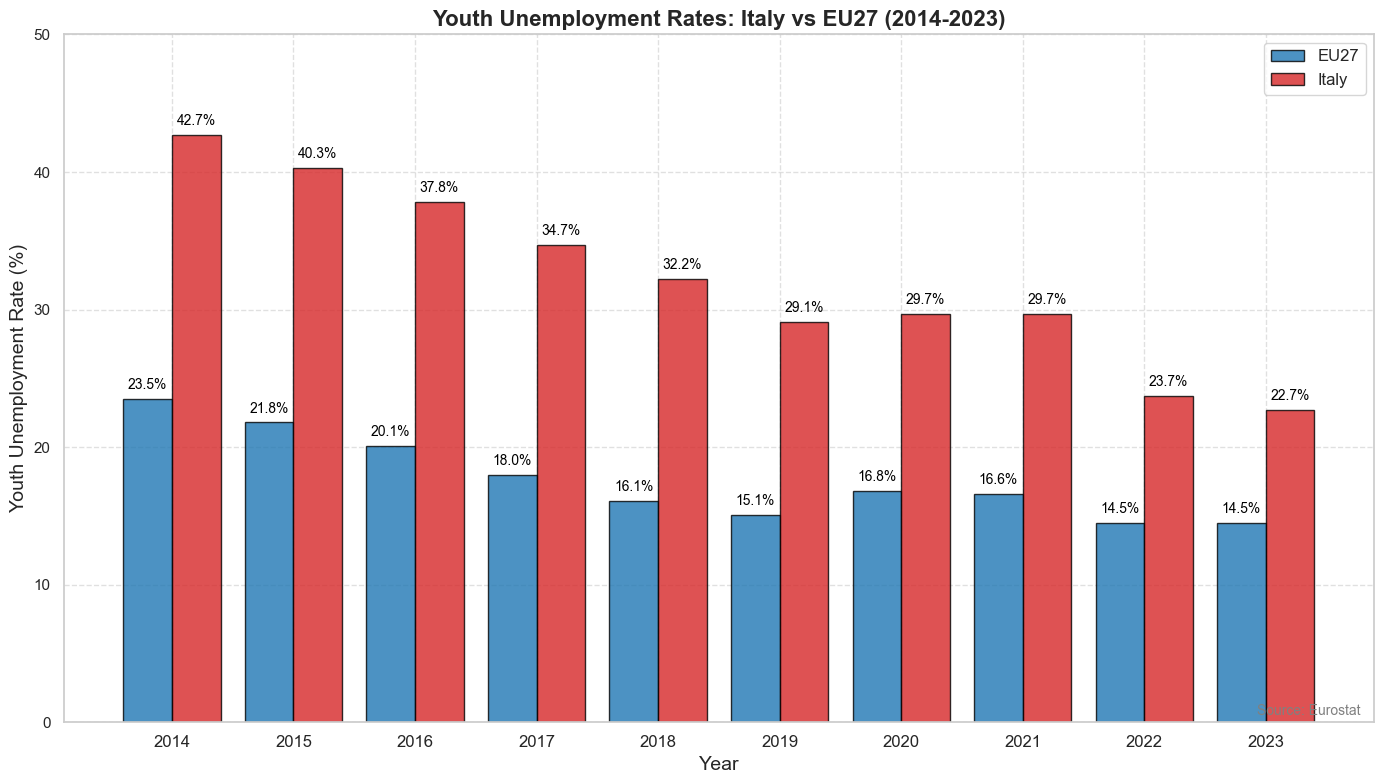

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Dati
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
eu27 = [23.5, 21.8, 20.1, 18.0, 16.1, 15.1, 16.8, 16.6, 14.5, 14.5]
italy = [42.7, 40.3, 37.8, 34.7, 32.2, 29.1, 29.7, 29.7, 23.7, 22.7]

# Configurazione del grafico
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

# Impostazione della posizione delle barre
x = np.arange(len(years))  # Posizioni per le barre
width = 0.4  # Larghezza delle barre

# Creazione delle barre
bars1 = plt.bar(x - width/2, eu27, width, label='EU27', color='#1f77b4', edgecolor='black', alpha=0.8)
bars2 = plt.bar(x + width/2, italy, width, label='Italy', color='#d62728', edgecolor='black', alpha=0.8)

# Aggiunta delle etichette di valore sulle barre
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f"{bar.get_height():.1f}%", 
             ha='center', va='bottom', fontsize=10, color='black')
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f"{bar.get_height():.1f}%", 
             ha='center', va='bottom', fontsize=10, color='black')

# Aggiunta di etichette, titolo e legenda
plt.xticks(x, years, fontsize=12)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Youth Unemployment Rate (%)', fontsize=14)
plt.title('Youth Unemployment Rates: Italy vs EU27 (2014-2023)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')

# Limiti e griglia
plt.ylim(0, 50)
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Firma del grafico
plt.annotate('Source: Eurostat', xy=(0.99, 0.01), xycoords='axes fraction', fontsize=10, ha='right', color='gray')

# Mostrare il grafico
plt.tight_layout()
plt.show()


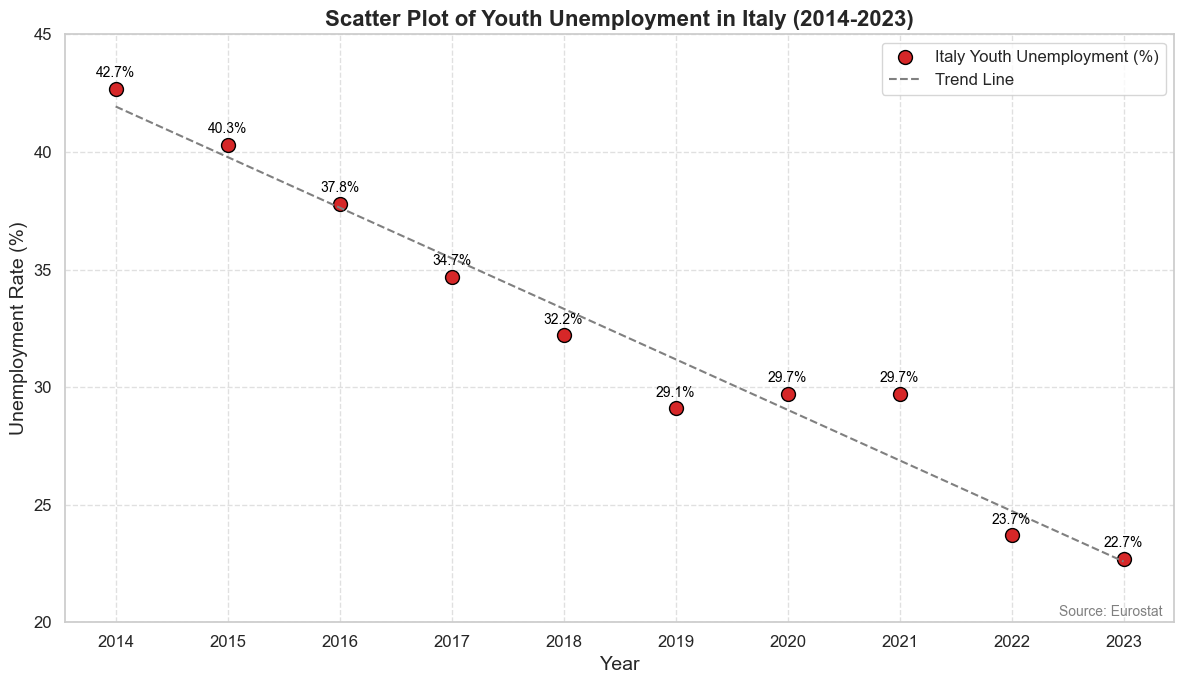

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dati
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
italy = [42.7, 40.3, 37.8, 34.7, 32.2, 29.1, 29.7, 29.7, 23.7, 22.7]

# Configurazione del grafico
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")

# Scatter plot
plt.scatter(years, italy, color='#d62728', s=100, label='Italy Youth Unemployment (%)', edgecolor='black')

# Linea di tendenza (opzionale)
z = np.polyfit(years, italy, 1)
p = np.poly1d(z)
plt.plot(years, p(years), linestyle='--', color='gray', label='Trend Line')

# Etichette dei punti
for i, value in enumerate(italy):
    plt.text(years[i], value + 0.5, f"{value:.1f}%", ha='center', fontsize=10, color='black')

# Titolo e descrizione
plt.title('Scatter Plot of Youth Unemployment in Italy (2014-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Unemployment Rate (%)', fontsize=14)

# Personalizzazione degli assi
plt.xticks(years, fontsize=12)
plt.yticks(range(20, 50, 5), fontsize=12)
plt.ylim(20, 45)

# Griglia e legenda
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12, loc='upper right')

# Firma del grafico
plt.annotate('Source: Eurostat', xy=(0.99, 0.01), xycoords='axes fraction', fontsize=10, ha='right', color='gray')

# Mostra il grafico
plt.tight_layout()
plt.show()


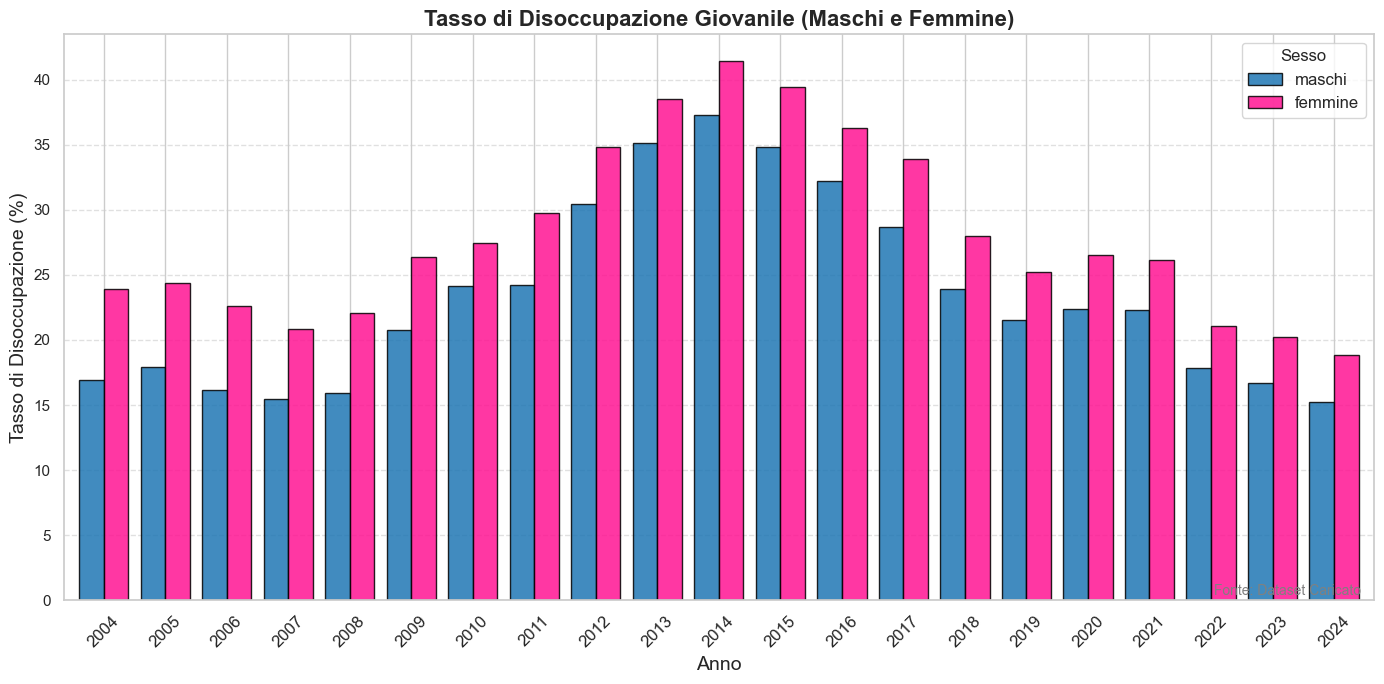

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricare i due dataset (uno per 15-24 anni e l'altro per 18-29 anni)

file_path_15_24 = './disoccupazione giovanile 15-24.csv' # Sostituisci con il percorso del primo file
file_path_18_29 = './disoccupazione giovanile 18-29.csv'  # Sostituisci con il percorso del secondo file

# Caricare i dati
data_15_24 = pd.read_csv(file_path_15_24)
data_18_29 = pd.read_csv(file_path_18_29)

# Filtrare le colonne rilevanti
data_15_24_filtered = data_15_24[['TIME', 'Sesso', 'Value']].dropna()
data_18_29_filtered = data_18_29[['TIME', 'Sesso', 'Value']].dropna()

# Estrarre l'anno da TIME e convertirlo in formato numerico
data_15_24_filtered['Anno'] = data_15_24_filtered['TIME'].str[:4].astype(int)
data_18_29_filtered['Anno'] = data_18_29_filtered['TIME'].str[:4].astype(int)

# Calcolare la media per il gruppo di età 18-24 e per il gruppo 15-29 separatamente
data_18_29_filtered_18_24 = data_18_29_filtered[data_18_29_filtered['Anno'].between(2018, 2024)]

# Unire i dati dei gruppi 15-24 e 18-29
combined_data = pd.concat([data_15_24_filtered, data_18_29_filtered_18_24])

# Calcolare la media per ogni anno, sesso
aggregated_combined_data = combined_data.groupby(['Anno', 'Sesso'], as_index=False)['Value'].mean()

# Pivot per organizzare i dati
pivot_combined_data = aggregated_combined_data.pivot(index='Anno', columns='Sesso', values='Value')

# Rimuovere la colonna del totale se presente
# Assumiamo che "Totale" sia una colonna extra che non vogliamo includere nel grafico
pivot_combined_data = pivot_combined_data[['maschi', 'femmine']]  # Se ci fosse una colonna "Totale", la rimuoviamo

# Creare il grafico a barre separate
plt.figure(figsize=(14, 7))

# Generare le barre per ogni gruppo separato (maschi e femmine)
pivot_combined_data.plot(kind='bar', color=['#1f77b4', '#ff1493'], width=0.8, alpha=0.85, edgecolor='black', ax=plt.gca())

# Titolo e etichette
plt.title('Tasso di Disoccupazione Giovanile (Maschi e Femmine)', fontsize=16, fontweight='bold')
plt.ylabel('Tasso di Disoccupazione (%)', fontsize=14)
plt.xlabel('Anno', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Legenda
plt.legend(title='Sesso', fontsize=12, loc='upper right')

# Griglia
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.6)

# Firma del grafico
plt.annotate('Fonte: Dataset Caricato', xy=(0.99, 0.01), xycoords='axes fraction', fontsize=10, ha='right', color='gray')

# Mostrare il grafico
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

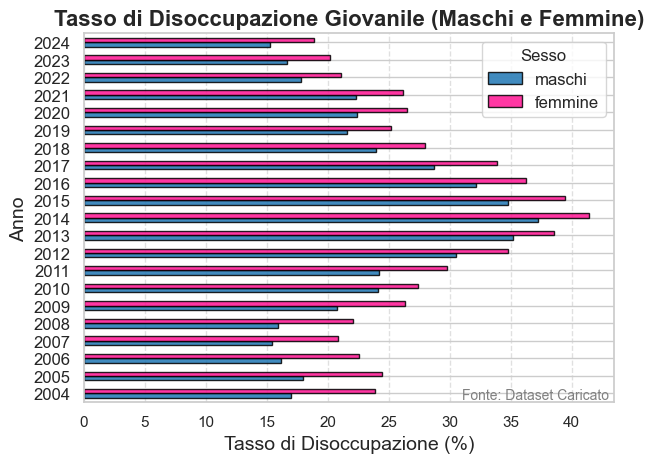

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricare i due dataset (uno per 15-24 anni e l'altro per 18-29 anni)

file_path_15_24 = './disoccupazione giovanile 15-24.csv'  # Sostituisci con il percorso del primo file
file_path_18_29 = './disoccupazione giovanile 18-29.csv'  # Sostituisci con il percorso del secondo file

# Caricare i dati
data_15_24 = pd.read_csv(file_path_15_24)
data_18_29 = pd.read_csv(file_path_18_29)

# Filtrare le colonne rilevanti
data_15_24_filtered = data_15_24[['TIME', 'Sesso', 'Value']].dropna()
data_18_29_filtered = data_18_29[['TIME', 'Sesso', 'Value']].dropna()

# Estrarre l'anno da TIME e convertirlo in formato numerico
data_15_24_filtered['Anno'] = data_15_24_filtered['TIME'].str[:4].astype(int)
data_18_29_filtered['Anno'] = data_18_29_filtered['TIME'].str[:4].astype(int)

# Calcolare la media per il gruppo di età 18-24 e per il gruppo 15-29 separatamente
data_18_29_filtered_18_24 = data_18_29_filtered[data_18_29_filtered['Anno'].between(2018, 2024)]

# Unire i dati dei gruppi 15-24 e 18-29
combined_data = pd.concat([data_15_24_filtered, data_18_29_filtered_18_24])

# Calcolare la media per ogni anno, sesso
aggregated_combined_data = combined_data.groupby(['Anno', 'Sesso'], as_index=False)['Value'].mean()

# Pivot per organizzare i dati
pivot_combined_data = aggregated_combined_data.pivot(index='Anno', columns='Sesso', values='Value')

# Rimuovere la colonna del totale se presente
pivot_combined_data = pivot_combined_data[['maschi', 'femmine']]  # Se ci fosse una colonna "Totale", la rimuoviamo

# Creare il grafico a barre separate con gli assi invertiti
plt.figure(figsize=(14, 7))

# Generare le barre per ogni gruppo separato (maschi e femmine)
pivot_combined_data.plot(kind='barh', stacked=False, color=['#1f77b4', '#ff1493'], alpha=0.85, edgecolor='black')

# Titolo e etichette
plt.title('Tasso di Disoccupazione Giovanile (Maschi e Femmine)', fontsize=16, fontweight='bold')
plt.xlabel('Tasso di Disoccupazione (%)', fontsize=14)
plt.ylabel('Anno', fontsize=14)
plt.yticks(rotation=0, fontsize=12)

# Legenda
plt.legend(title='Sesso', fontsize=12, loc='upper right')

# Griglia
plt.grid(visible=True, axis='x', linestyle='--', alpha=0.6)

# Firma del grafico
plt.annotate('Fonte: Dataset Caricato', xy=(0.99, 0.01), xycoords='axes fraction', fontsize=10, ha='right', color='gray')

# Mostrare il grafico
plt.tight_layout()
plt.show()


Regioni senza dati di disoccupazione (NaN): ['friuli venezia giulia' 'trentino-alto adige/sudtirol' "valle d'aosta"]


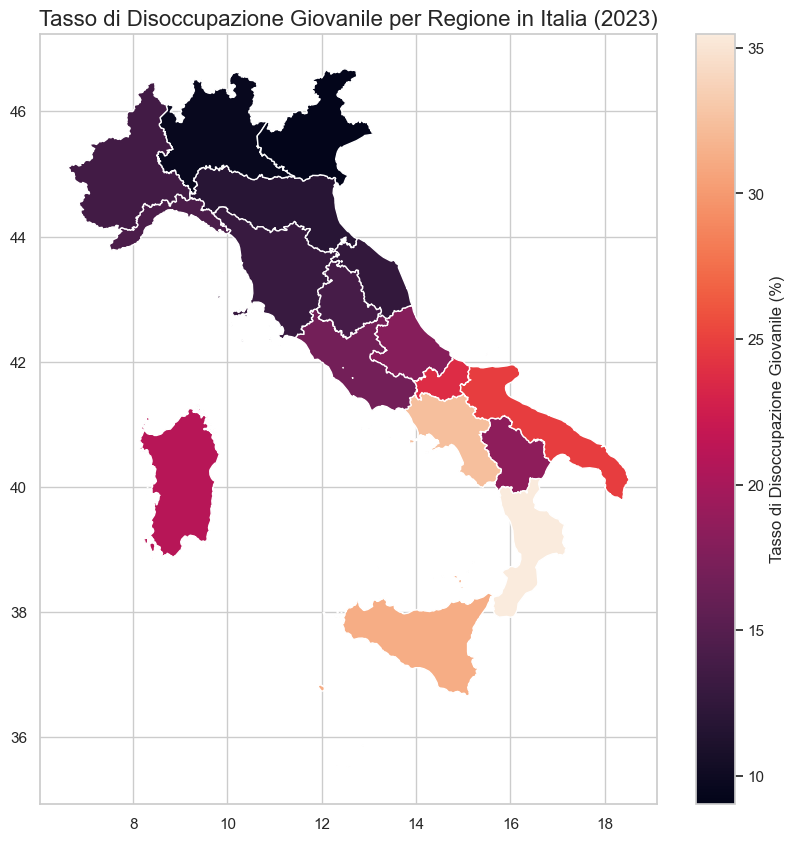

In [82]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Carica il CSV con i tassi di disoccupazione
file_path = 'disoccupazione regioni.csv'  # Sostituisci con il percorso del tuo CSV
df = pd.read_csv(file_path)



# Pulisci i nomi delle regioni nel CSV (rimuovi spazi extra e converte tutto in minuscolo)
df['Territorio'] = df['Territorio'].str.strip().str.lower()



# Filtra per l'anno 2023, per il sesso "totale" e per la classe di età "15-29 anni" (giovani)
df_2023 = df[(df['TIME'] == 2023) & (df['SEXISTAT1'] == 9) & (df['ETA1'] == 'Y15-29')]



# Mantieni solo le colonne rilevanti
df_2023 = df_2023[['Territorio', 'Value']]


# Carica il file GeoJSON delle regioni italiane
geojson_path = 'italy-with-regions_1458.geojson'  # Sostituisci con il percorso del tuo GeoJSON
gdf = gpd.read_file(geojson_path)

# Pulisci i nomi delle regioni nel GeoDataFrame (rimuovi spazi extra e converte tutto in minuscolo)
gdf['name'] = gdf['name'].str.strip().str.lower()


# Mappa i tassi di disoccupazione alle regioni italiane
gdf['disoccupazione'] = gdf['name'].map(lambda x: df_2023[df_2023['Territorio'] == x]['Value'].values[0] if x in df_2023['Territorio'].values else None)

# Mappa manualmente i nomi delle regioni che hanno nomi diversi tra il CSV e il GeoJSON
region_mapping = {
    'friuli venezia giulia': 'friuli-venezia giulia',
    'trentino-alto adige/sudtirol': 'trentino alto adige / südtirol',
    "valle d'aosta": "valle d'aosta / vallée d'aoste"
}

# Applica la mappatura manuale
df_2023['Territorio'] = df_2023['Territorio'].replace(region_mapping)

# Verifica se ci sono NaN nei tassi di disoccupazione
print("Regioni senza dati di disoccupazione (NaN):", gdf[gdf['disoccupazione'].isna()]['name'].unique())

# Rimuovi le regioni senza dati di disoccupazione (NaN)
gdf = gdf.dropna(subset=['disoccupazione'])

# Crea la mappa coropletica
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Crea la mappa coropletica
gdf.plot(column='disoccupazione', ax=ax, legend=True,
         legend_kwds={'label': "Tasso di Disoccupazione Giovanile (%)",
                      'orientation': "vertical"})

# Titolo della mappa
ax.set_title('Tasso di Disoccupazione Giovanile per Regione in Italia (2023)', fontsize=16)

# Mostra la mappa
plt.show()
